In [1]:
'''
Script to generate plots from paper for Part II
'''

import numpy as np
import pandas as pd
import json 
import os
import sys
import random
import math
import matplotlib.pylab as plt 
import seaborn as sns
import scipy.stats as stats
from matplotlib.font_manager import FontProperties
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.gridspec as gridspec
import itertools
import matplotlib

In [2]:
import os
save_dir = "./results/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
# sources = ["human", "gpt-3"]
# constraints = ['unconstrained', 'constrained_single', 'constrained_many']
# constraints_exps = ['unconstrained', 'single-constraint', 'all-constraints']

In [3]:
constraint_text_map =  {"unconstrained": "Initial", 
                       "constrained_single": "Most Common\nConstraint", 
                       "constrained_many": "All Constraints"}
source_text_map = {"gpt-3": "LLM", 
                  "human": "Human"}

source_palette = {"LLM": "gray", "Human": "#3C739F"}

ax_size = 18
title_size=20
tick_size = 14
tick_color = "gray"
legend_text_size = 14

In [4]:
# parser-and-planner vs. LLM results

def parse_success(success_str):
    return 1 if success_str == True else 0

df = pd.read_csv(f"{save_dir}/final-output.csv")

print(df.head(3))

methods = ["codex", "gpt"]
constraints = ["one", "two", "all"]

data = {}

for method in methods:
    if method == "codex": df_subset = df[df.method == "codex"]
    else: df_subset = df[df.method == "gpt"]
    
    success_data = {}
    
    for constraint in constraints:
        constraint_df = df_subset[df_subset.constraints == constraint]
        successes = [parse_success(success_str) for success_str in constraint_df.succeed]
        
        success_data[constraint] = successes
        
    data[method] = success_data

   Unnamed: 0  id  succeed constraints method gpt_prompt gpt_res
0           0   3     True         one  codex        NaN     NaN
1           1   4     True         one  codex        NaN     NaN
2           2   5     True         one  codex        NaN     NaN


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

two_P+S vs. two_LLM: Custom statistical test, P_val:2.200e-16
one_P+S vs. one_LLM: Custom statistical test, P_val:2.200e-16


<ipython-input-5-1e4948a23528>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(tick,1) for tick in ax.get_yticks()[:-1]], size = tick_size, color=tick_color)
/Users/kcollins/opt/anaconda3/lib/python3.8/site-packages/statannotations/Annotator.py:803: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "


all_P+S vs. all_LLM: Custom statistical test, P_val:2.200e-16


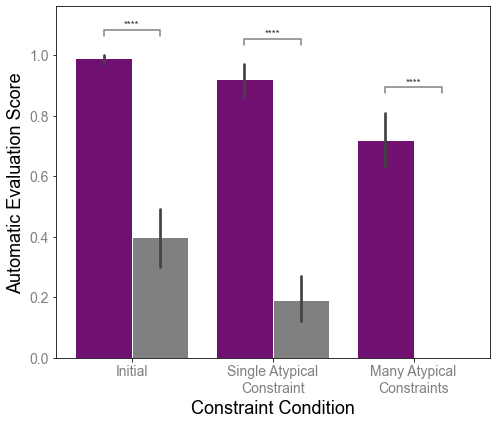

In [5]:
# stat annotation help from: https://github.com/trevismd/statannotations

from statannotations.Annotator import Annotator
import statsmodels

color_palette = ["purple", "gray"]

constraint_text_map =  {"one": "Initial", 
                       "two": "Single Atypical\nConstraint", 
                       "all": "Many Atypical\nConstraints"}
source_text_map = {"gpt": "LLM", 
                  "codex": "P+S"}

fig, ax = plt.subplots(figsize=(7,6))
sns.set_style(style="white")

x = 'Number of Constraints'
y = 'Success Score'
hue = 'Subject ID'

pairs_q1 = [(('one', 'P+S'), ('one', 'LLM')),
           (('two', 'P+S'), ('two', 'LLM')),
           (('all', 'P+S'), ('all', 'LLM'))]

# p-values from associated R analysis 
p_values = [2.2e-16,2.2e-16,2.2e-16]

successes = []
for method in data:
    for constraint in constraints:
        for score in data[method][constraint]:
            row = [constraint, source_text_map[method], score]
            successes.append(row)
    
success_df = pd.DataFrame(successes, columns = ['Number of Constraints', 'Subject ID', 'Success Score'])

ax = sns.barplot(x=x, y=y, hue=hue, data=success_df, palette=color_palette,ax=ax)
ax.set_ylabel('Automatic Evaluation Score',fontsize=ax_size)

ax.set_xlabel("Constraint Condition", fontsize=ax_size)
ax.set_yticklabels([round(tick,1) for tick in ax.get_yticks()[:-1]], size = tick_size, color=tick_color)
ax.set_xticklabels(list(constraint_text_map.values()), size = tick_size, color=tick_color)

ax.legend([],[], frameon=False)

plotting_params = {'x':x, 'y':y, "hue": hue,
                   'data': success_df, 
                   'text_format':'star', 'verbose':2}
# add annotations
annotator = Annotator(ax, pairs_q1, **plotting_params)
annotator.set_pvalues(p_values)
annotator.configure(color="gray")
annotator.annotate()
plotting_params = {'x':x, 'y':y,
                   'data': success_df, 
                   'text_format':'star', 'verbose':2}

plt.tight_layout()
plt.savefig(f"{save_dir}parser_planner.png",dpi=400)

                                           